In [8]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats import diagnostic

from scipy import stats
import scipy.fft as sf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# ***Channels DF***

In [10]:
channels_df = pd.read_csv('data/df_channels_en.tsv.gz', sep='\t', compression='infer')
channels_df.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [11]:
channels_df.groupby('category_cc').mean()

,subscribers_cc,videos_cc,subscriber_rank_sb,weights
category_cc,,,,
Autos & Vehicles,111158.375169,682.188664,396373.648043,7.680089
Comedy,432108.482347,287.109371,299991.221927,6.782554
Education,268202.635140,552.903883,327824.047033,6.868359
Entertainment,351383.375321,645.804148,323417.997255,6.903652
Film and Animation,228242.992727,325.526109,371171.466182,7.608686
Gaming,202022.438068,750.962568,375404.958000,7.745133
Howto & Style,233022.904842,392.432337,322855.754779,6.834346
Music,292134.635948,666.219518,366227.229524,7.420399
News & Politics,294673.487406,7844.407424,318111.243482,6.788842


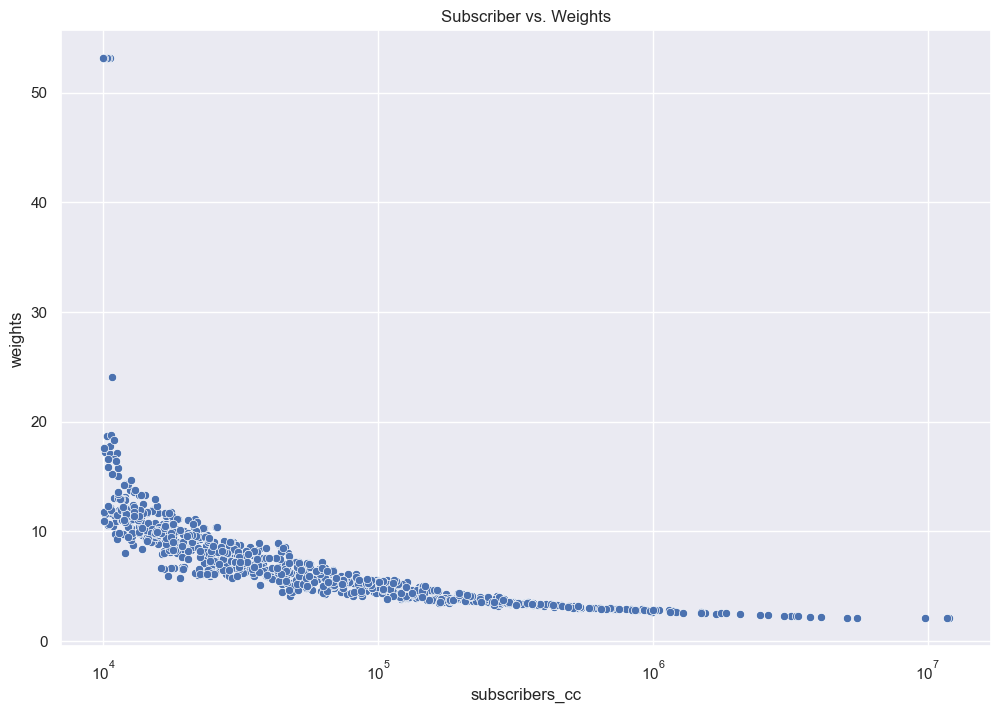

In [25]:
plt.figure(figsize=(12,8))

sns.scatterplot(channels_df.sample(1000), x='subscribers_cc', y='weights')

plt.xscale('log')

plt.title('Subscriber vs. Weights')

plt.show()

# ***Timeseries***

In [16]:
timeseries_df = pd.read_csv('data/df_timeseries_en.tsv.gz', sep='\t', compression='infer')
timeseries_df['datetime'] = pd.to_datetime(timeseries_df['datetime'])
timeseries_df.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [27]:
categorized_sample_df = timeseries_df.groupby(['category', 'datetime']).mean().reset_index().groupby('category')
categories = categorized_sample_df.groups.keys()

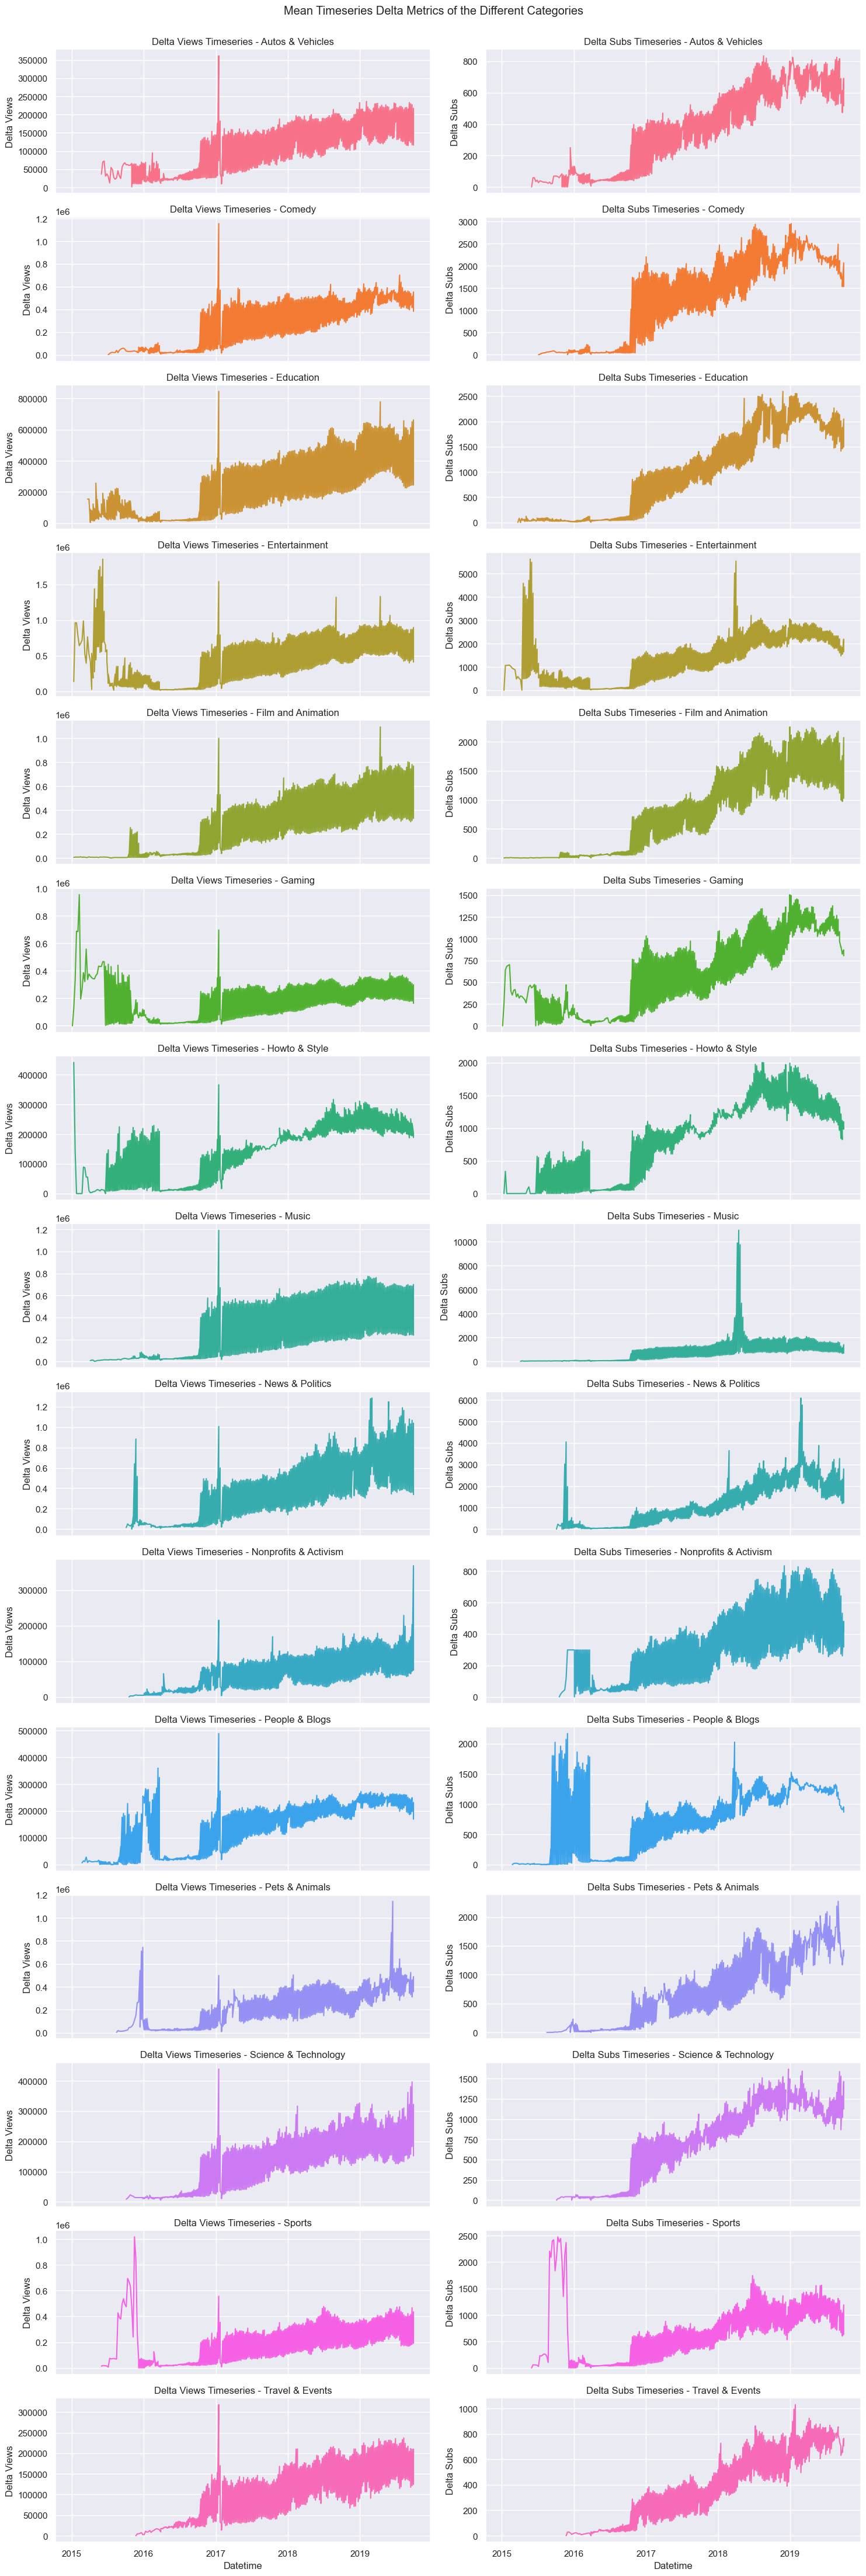

In [30]:
N = len(categories)

fig, axs = plt.subplots(N, 2, figsize=(15, 3 * N), sharex='col')
fig.suptitle(f"Mean Timeseries Delta Metrics of the Different Categories")

# Create a color palette for each category
palette = sns.color_palette("husl", n_colors=N)

for i, (category, category_df) in enumerate(categorized_sample_df):
    # Delta Views Timeseries Plot
    sns.lineplot(category_df, x='datetime', y='delta_views', ax=axs[i, 0], color=palette[i])
    axs[i, 0].set_title(f'Delta Views Timeseries - {category}')
    axs[i, 0].set_xlabel('Datetime')
    axs[i, 0].set_ylabel('Delta Views')

    # Delta Subs Timeseries Plot
    sns.lineplot(category_df, x='datetime', y='delta_subs', ax=axs[i, 1], color=palette[i])
    axs[i, 1].set_title(f'Delta Subs Timeseries - {category}')
    axs[i, 1].set_xlabel('Datetime')
    axs[i, 1].set_ylabel('Delta Subs')


plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to prevent clipping of suptitle
plt.show()

Here, we observe that all the categories seems to move more or less similarily (only in trend, they have different scales) - they all tend to the global mean timeseries (see below). This might be due to the size of the data, which is really large, thus in the end converging to the same global trend. 

<Figure size 1000x500 with 0 Axes>

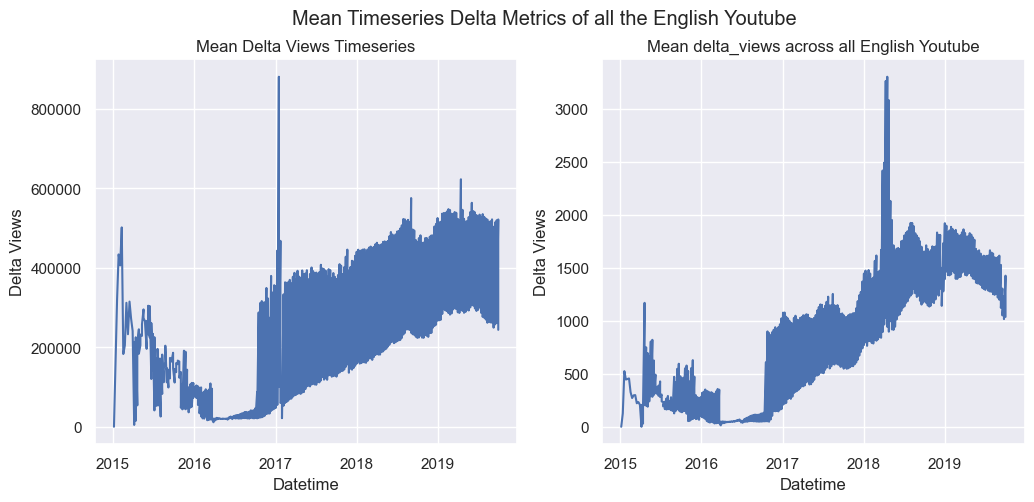

In [37]:
mean_timeseries = timeseries_df.groupby('datetime').mean().reset_index()
mean_timeseries.head()

plt.figure(figsize=(10,5))

fig, axs = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(f"Mean Timeseries Delta Metrics of all the English Youtube")

sns.lineplot(mean_timeseries, x='datetime', y='delta_views', ax=axs[0])
axs[0].set_title(f'Mean Delta Views Timeseries')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('Delta Views')

sns.lineplot(mean_timeseries, x='datetime', y='delta_subs', ax=axs[1])
axs[1].set_title(f'Mean Delta Subs Timeseries')
axs[1].set_xlabel('Datetime')
axs[1].set_ylabel('Delta Subs')

plt.xlabel('Datetime')
plt.ylabel('Delta Views')

plt.title('Mean delta_views across all English Youtube')

plt.show()

Thus, we might restrict ourselves to one category because since we look for movements in communities, we want to have ideally some communities "stealing" the views of another - which is not the case here!